In [1]:
%matplotlib inline
import pickle
import sncosmo
import numpy as np
import matplotlib.pyplot as plt
sncosmo.__version__

'1.6.0'

In [2]:
source = pickle.load(open('SN2005hk/sn2005hk.source.pickle', "rb" ), encoding="latin-1" )['source']
sedmodel = sncosmo.Model(source=source)

print(sedmodel)

source:
  class      : TimeSeriesSource
  name       : None
  version    : None
  phases     : [-15, .., 65] days
  wavelengths: [1000, .., 25000] Angstroms
parameters:
  z         = 0.0
  t0        = 0.0
  amplitude = 1.0


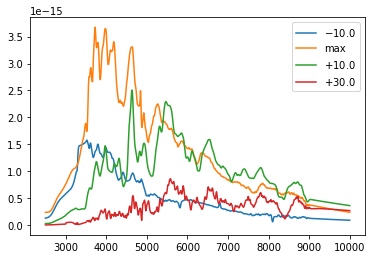

In [3]:
# spectra

sedmodel.set(amplitude=1.0, z=0.0)
w = np.linspace(2500,10000,750)
plt.plot(w,sedmodel.flux(-10.0,wave=w),label=r'$-$10.0')
plt.plot(w,sedmodel.flux(0.0,wave=w),label='max')
plt.plot(w,sedmodel.flux(10.0,wave=w),label=r'$+$10.0')
plt.plot(w,sedmodel.flux(30.0,wave=w),label=r'$+$30.0')
plt.legend()
plt.show()

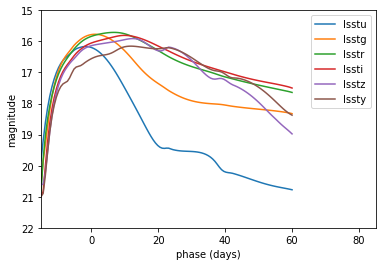

In [4]:
# light curves
filters = ['lsstu','lsstg','lsstr','lssti','lsstz','lssty']
phase = np.linspace(-15.,60.,115)

plt.plot()
for f in filters:
    band = sncosmo.get_bandpass(f)
    sedmag = sedmodel.bandmag(band,'ab',phase)
    plt.plot(phase,sedmag,label=f)
plt.xlim(-15,85)
plt.ylim(22,15)
plt.xlabel('phase (days)')
plt.ylabel('magnitude')
plt.legend()
plt.show()

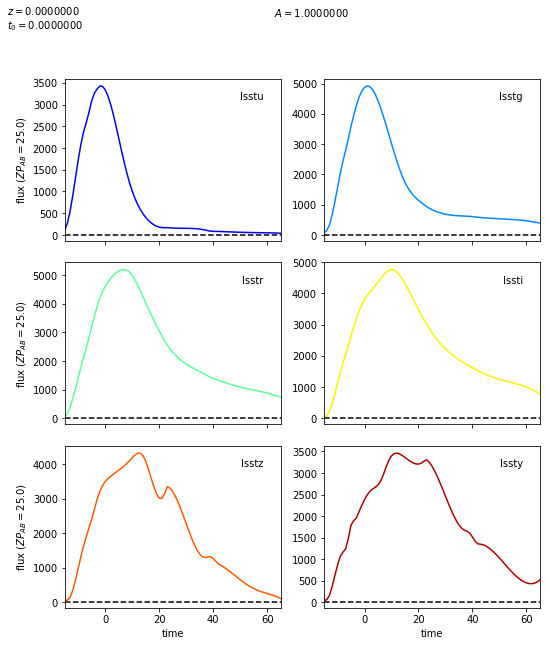

In [5]:
figure = sncosmo.plot_lc(model=sedmodel,bands=filters)